In [1]:
!wget "https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip"

The name is too long, 530 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP+RYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV.
--2020-03-02 18:33:26--  https://storage.googleapis.com/kaggle-data-sets/500984/961003/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583345709&Signature=Bplz0K9sI33VxVLBkKnXOBgTTIZUAwl32LT8LHJ6gshlXFbqoj37zrv4yk0ldjIeofp0uvMswQP%2BRYVi4rGmtVA9%2FFZph89lDmgW3qeRAp8qxH7QuwhV2kcN5J32125g9AV3lw5bKNDvwQRsscHZ%2BXMk0K1Z35aOxyBBmCyv0cdIWKhyiSVi298%2BngfKoB6LUE%2FJE4oxtj70dnZlYEfbMS9KFwPuTiXkK3ThaD3BpmeBSPOaPE%2B7JXFiihNQbwQnYg%2B33Z2CWdKNpB744DuYoVyqW2adwG2j40LVFL6qroU0XpjsHULQMqC4wytW1kcKTCS6Mhset4Nv8Htd7J5cOQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dnaruto-hand-sign-dataset.zip
Resolving storage.googleapis.com (storage.googl

In [3]:
!unzip arc.zip

Archive:  arc.zip
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0a5ad922e-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_0d3176320-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1b0fea37a-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/bird/bird_IMG_1dc80f91c-4d58-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_02a62b902-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_05eee5bea-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_13074c5c4-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_16519402a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_IMG_236293c2a-4d5b-11ea-b58b-0242ac1c0002.jpg  
  inflating: Pure Naruto Hand Sign Data/test/boar/boar_

In [0]:
from fastai.vision import *

In [0]:
path = Path('Pure Naruto Hand Sign Data/')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='./train', test='./test', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
#data.show_batch()

In [8]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


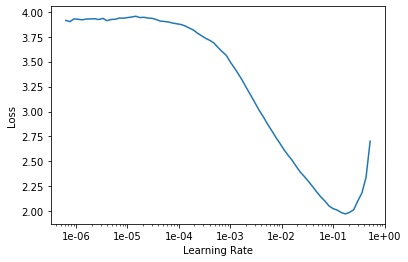

In [9]:
learner.lr_find()

learner.recorder.plot()

In [10]:
learner.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.314547,0.436099,0.863109,01:33
1,1.144651,0.141431,0.955916,01:34
2,0.674302,0.066774,0.979118,01:36
3,0.409967,0.045461,0.988399,01:34
4,0.284850,0.041399,0.988399,01:35


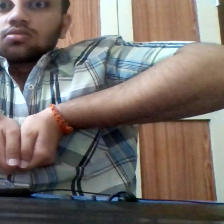

In [11]:
learner.data.train_ds[1][0]

In [12]:
learner.data.train_ds[1][1]

Category boar

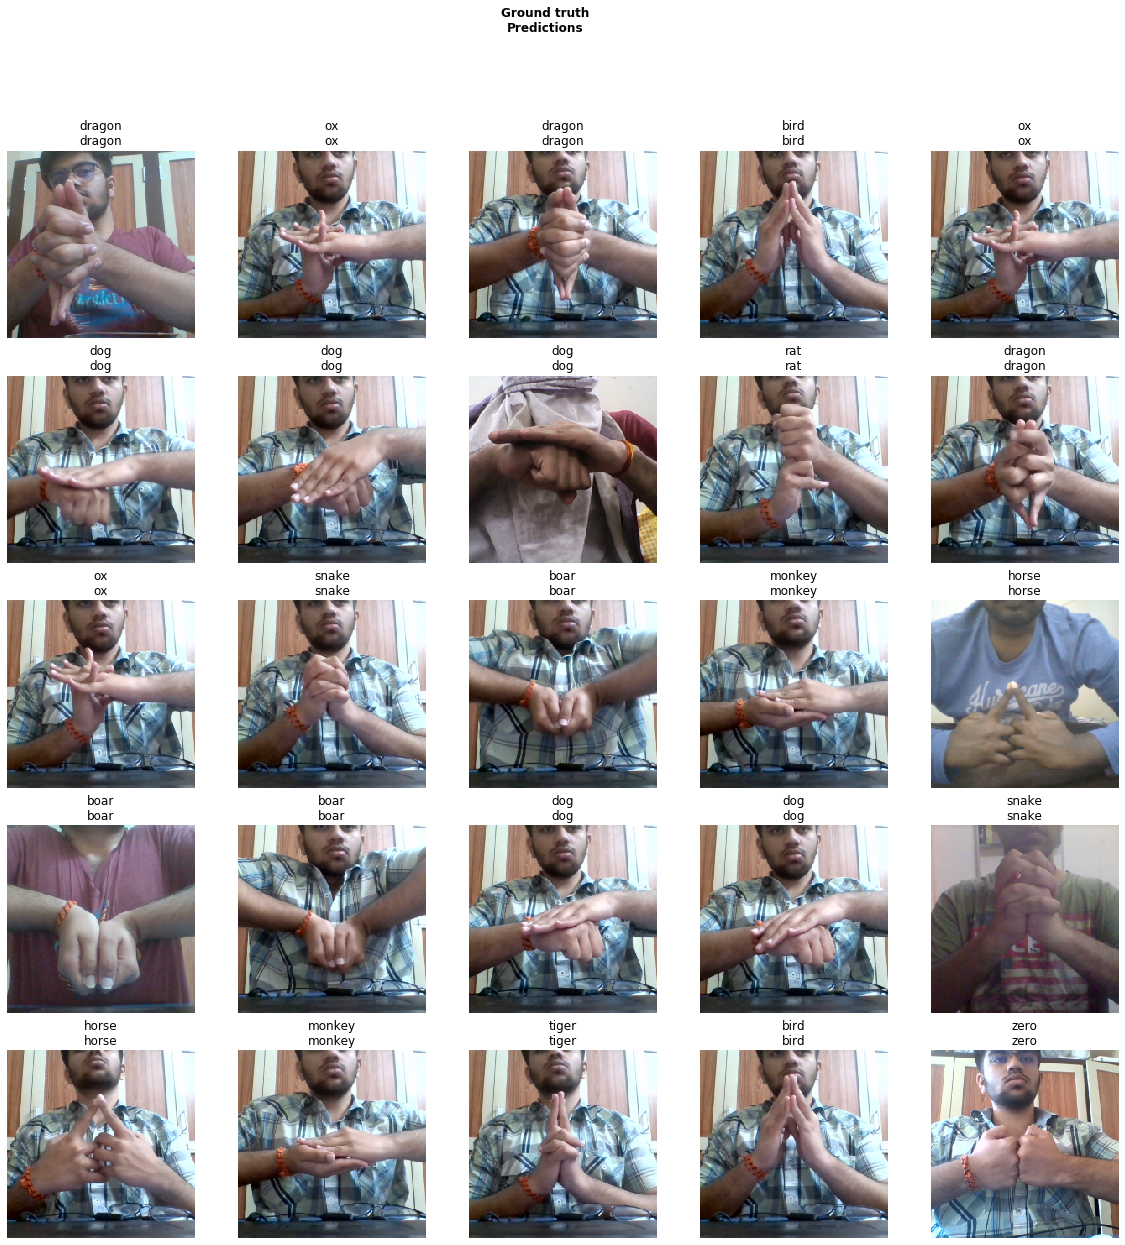

In [13]:
learner.show_results()

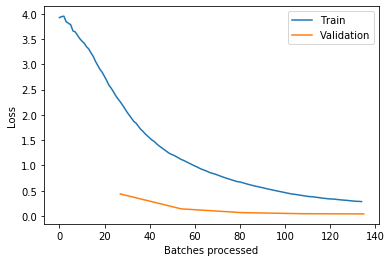

In [14]:
learner.recorder.plot_losses()

In [15]:
img = learner.data.train_ds[1][0]
learner.data.train_ds[1][1]

Category boar

In [16]:
learner.predict(img)

(Category boar,
 tensor(1),
 tensor([5.5471e-07, 9.9986e-01, 1.6446e-06, 7.5116e-05, 4.6999e-05, 6.9029e-08,
         9.8126e-06, 6.7637e-07, 1.2579e-07, 2.5243e-07, 8.6537e-07, 1.1655e-06,
         1.7085e-06]))

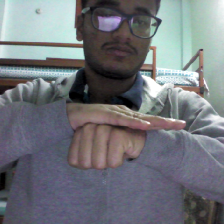

In [17]:
learner.data.valid_ds[100][0]

In [18]:
learner.data.valid_ds[100][1]

Category dog

In [19]:
img = learner.data.valid_ds[100][0]
learner.predict(img)

(Category dog,
 tensor(2),
 tensor([2.5446e-04, 1.2098e-02, 2.9750e-01, 7.2315e-03, 1.9978e-01, 1.4417e-03,
         2.0555e-01, 5.7144e-03, 5.2466e-04, 3.3989e-03, 2.1641e-01, 1.4617e-03,
         4.8647e-02]))

In [20]:
img = learner.data.test_ds[1][0]
learner.predict(img)

(Category boar,
 tensor(1),
 tensor([0.0050, 0.6059, 0.0286, 0.0296, 0.0535, 0.0009, 0.0733, 0.0018, 0.0016,
         0.0314, 0.0202, 0.1336, 0.0146]))

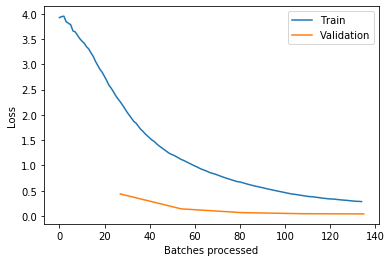

In [21]:
learner.recorder.plot_losses()

In [0]:
learner.path=Path("")
learner.export("Naruto-resnet18-model.pkl")